# Data Structures and Processing

## Week 5: Introduction to Pandas

### Remarks:

1. Press the `install requirements` button above to install the required packages.  See the `requirements.txt` for list of packages to be installed.

2. Make sure that you are following the conventions.  For examples, `import pandas as pd`, which imports pandas packages and sets the abbreviation for it.

3. Do not import the packages without the short names.  Doing so might lead to a namespace conflict, or unintended uses of functions coming from two libraries as a part of different implementations.

### Load Libraries

In [4]:
import numpy as np
import pandas as pd

### Task 1

Pandas provide the function `pd.read_csv` that takes name of the file (a string) as an argument. In this case, it is assumed that you want to read a comma-separated-file (a file, where fields are separated by a single character ","). If it is the case that the fields are separated by a different character than ",", then an additional named argument `sep` could be provided. It is also common to have a TAB character as a separation, or a semi-colon ";" as a separator.

Consider the file `imdb_ratings.tsv` (tab-separated-file) in the working directory and load it into the variable `df`.

In [5]:
# Your solution goes here. Replace None with your solution
df = pd.read_csv("imdb_ratings.tsv", sep = '\t')

### Task 2

As a next step, we could like to have a look at the contents of the data imported into `df`. For this, a useful method is `head()`, which looks at first few lines. An integer could be provided to the method `head(n)`, in which case, only first `n` lines are returned. Another useful method is `tail()`, which works exactly like the method `head()`, and it returns last few lines.

An important note here is that the object returned by the application of the methods `head()` or `tail()` is also a DataFrame.

Assign the object to `df_head_10`, which is returned by using `head()` and focus on the first 10 lines.

In [6]:
# Your solution goes here. Replace None with your solution
df_head_10 = df.head(10)
df_head_10


,stars_rating,title,rating,genre,duration,actors
0,7.7,Zodiac,R,Crime,157,"{""Jake Gyllenhaal"", ""Robert Downey Jr."", ""Mark..."
1,8.2,Mary and Max,NOT RATED,Animation,92,"{""Toni Collette"", ""Philip Seymour Hoffman"", ""E..."
2,7.7,The Producers,PG,Comedy,88,"{""Zero Mostel"", ""Gene Wilder"", ""Dick Shawn""}"
3,8.6,Spirited Away,PG,Animation,125,"{""Daveigh Chase"", ""Suzanne Pleshette"", ""Miyu I..."
4,7.4,The NeverEnding Story,PG,Adventure,102,"{""Noah Hathaway"", ""Barret Oliver"", ""Tami Stron..."
5,8.7,City of God,R,Crime,130,"{""Alexandre Rodrigues"", ""Matheus Nachtergaele""..."
6,8.4,The Kid,NOT RATED,Comedy,68,"{""Charles Chaplin"", ""Edna Purviance"", ""Jackie ..."
7,8.2,Gran Torino,R,Drama,116,"{""Clint Eastwood"", ""Bee Vang"", ""Christopher Ca..."
8,7.8,Changeling,R,Drama,141,"{""Angelina Jolie"", ""Colm Feore"", ""Amy Ryan""}"
9,8.0,Persepolis,PG-13,Animation,96,"{""Chiara Mastroianni"", ""Catherine Deneuve"", ""G..."


### Task 3

At this point, your probably must have noticed that, the tabular data in `df` contains 6 columns, and hundreds of rows. The types of the columns are either strings or numbers (numpy integers or numpy floats). Notice that the column containing actors "looks" like a Python's builtin data type `set`. But pandas, knows it only as a string. We could leave it like this, but the data presentation could be improved, by identifying the actors as not strings but as a set of strings (the actors). We could have the list of actors, but having set should work fine, as it is not important what actor appears where in the list.

Let us improve `df`, to make sure that the last column contains sets and not strings.

In [86]:
df["actors"] = df["actors"].apply(set)

### Task 4

Notice that the data is not sorted at all with respect to any column. We would like to sort `df` with respect to the column `stars_rating`. In order to do that we use the method `sort_values()` with the named arguments `by` and `ascending=False`. The argument `by` takes the column name with respect to which, we want to sort the data frame.

Notice that the application of the method `sort_values()` does not modify the original variable, but it returns a new data frame.

Assign the sorted form of `df` with respect to the column `stars_rating`and assign the returned data frame to the variable `df_sorted`.

In [87]:
# Your solution goes here. Replace None with your solution
df_sorted = df.sort_values(by= "stars_rating", ascending = False)
print(df_sorted)

     stars_rating                     title     rating      genre  duration  \
716           9.3  The Shawshank Redemption          R      Crime       142   
167           9.2             The Godfather          R      Crime       175   
954           9.1    The Godfather: Part II          R      Crime       200   
187           9.0           The Dark Knight      PG-13     Action       152   
494           8.9              12 Angry Men  NOT RATED      Drama        96   
..            ...                       ...        ...        ...       ...   
935           7.4      Crazy, Stupid, Love.      PG-13     Comedy       118   
938           7.4        Death at a Funeral          R     Comedy        90   
949           7.4            Predestination          R      Drama        97   
35            7.4  Manhattan Murder Mystery         PG     Comedy       104   
4             7.4     The NeverEnding Story         PG  Adventure       102   

                                                act

### Task 5

We are now going to use induced boolean array to filter down to some records. At this step, we are going to work with `df`, and not with `df_sorted`.

We want to return only those records of movies, whose ratings are between 8.5 and 9 (both inclusive). For this, we create a `df_rating_filter_85_90`

In [88]:
# Your solution goes here. Replace None with your solution
df_rating_filter_85_90 = (df["stars_rating"]>= 8.9)& (df["stars_rating"] <=9.0)


### Task 6

We would like to filter all the movies, in which Tom Hanks has acted.

To achieve this, you could first write down a filter `tom_hanks_filter`, which is a pandas Series, and which could be used as a boolean mask to filter to desired records. We recommend working with the `df_sorted`.

In [118]:
# Your solution goes here. Replace None with your solution

tom_hanks_filter = (df_sorted["actors"] == " Tom Hanks")
tom_hanks_movies = df_sorted[tom_hanks_filter]








Empty DataFrame
Columns: [stars_rating, title, rating, genre, duration, actors]
Index: []


,stars_rating,title,rating,genre,duration,actors


### Task 7 (Read Only)

There are several different types of summaries that one can generate for a given data frame. Let us take an example, where we are going to count movies for each rating, and plot the result, with number of movies along vertical axis and rating along horizontal axis.

<Axes: xlabel='rating', ylabel='Number of Movies'>

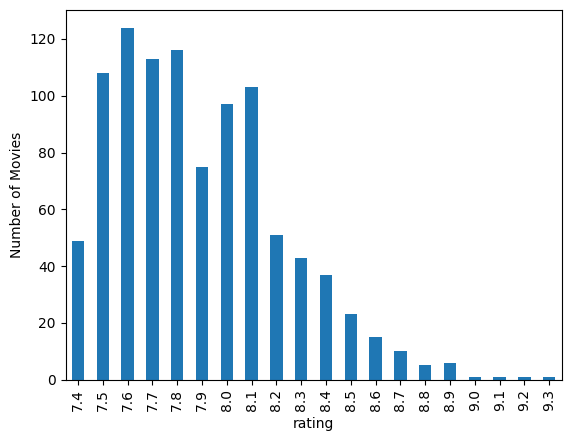

In [1]:
# Load Libraries, if they are not done so far.
import numpy as np
import pandas as pd

# Let us reload the data, in case, it is not done already. (Optional)
df = pd.read_csv("imdb_ratings.tsv", sep="\t")

# access the column, and use the aggregate method value_counts() to count
# the number of times a rating appears in the selected pandas series.
df_ratings_movie_counts = df.iloc[:,0].value_counts().sort_index()

# Use plot() method with named arguments.
df_ratings_movie_counts.plot(kind="bar",
                             xlabel="rating",
                             ylabel="Number of Movies",
                             legend=False)